<a href="https://colab.research.google.com/github/anapaulaoa/DataLiteracy/blob/main/DataLiteracy_ProjetoFinal_births.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar a base de dados

In [1]:
import pandas as pd

In [2]:
base = pd.read_csv(r'births.csv' , encoding = 'latin-1')

In [3]:
display(base)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


# Efetuar a Preparação da Base

## Efetuar a Limpeza da Base

*   Ao visualizarmos a base na etapa anterior, verificamos que para alguns anos não há a informação do dia de nascimento, somente mês e ano. Como as nossas análises compreendem os dias da semana, fizemos a exclusão das informações com valores nulos.

*   Também foram excluídas linhas com valores inválidos, como por exemplo 99 no campo onde deveria estar informado o número do dia no mês.






In [4]:
import numpy as np

In [5]:
cleanBase = base
indexDay = cleanBase[cleanBase['day'] == 99 ].index
indexDay2 = cleanBase[cleanBase['day'] == 'null' ].index
cleanBase.drop(indexDay, inplace = True)
cleanBase.drop(indexDay2, inplace = True)
cleanBase = cleanBase.dropna()
display(cleanBase)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


## Limpeza dos Dias Inexistentes

No decorrer das nossas análises, observamos que também havia na base dias inválidos, como por exemplo, dia 30 de fevereiro. Dessa forma, criamos um dicionário com a indicação de quantos dias tem em cada mês para que pudéssemos efetuar a exclusão dos valores inexistentes no calendário.

O objetivo dessa correção foi permitir a correta inclusão dos dias da semana em nossa base. Dessa forma, ato contínuo já efetuamos a inclusão dos dias da semana na base, informação necessária para as análises que serão efetuadas a seguir.

In [6]:
import datetime as dt

In [7]:
df_cleanBase = cleanBase
print(df_cleanBase)

       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
...     ...    ...   ...    ...     ...
15062  1988     12  29.0      M    5944
15063  1988     12  30.0      F    5742
15064  1988     12  30.0      M    6095
15065  1988     12  31.0      F    4435
15066  1988     12  31.0      M    4698

[14717 rows x 5 columns]


In [8]:
df_cleanBase = cleanBase
df_cleanBase.reset_index(drop=True, inplace=True)
df_cleanBase['day'] = df_cleanBase['day'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Criação do dicionário que indica quantos dias tem cada mês 
dict_help = {1:31,
2:28,
3:31,
4:30,
5:31,
6:30,
7:31,
8:31,
9:30,
10:31,
11:30,
12:31}

df_teste = df_cleanBase 
# Criação de um novo dataframe, em que os dias que não são válidos para cada mês não são incluídos
df_auxiliar = pd.DataFrame()
print('Aguarde estamos processando...')
# Para cada linha do dataframe
for i in range(0,len(df_teste)):
  print(f"iteração {i} de {len(df_teste)} - {(i/len(df_teste))*100} %")
  # Trago o mês daquela linha
  int_month = df_teste.iloc[[i]]['month'][i] 
  # Trago o dia daquela linha  
  int_day = df_teste.iloc[[i]]['day'][i]    
  # Se aquele dia é menor ou igual do que o dia máximo daquele mês convencionado
  if int_day <= dict_help[int_month]:
    # Aquela linha é adicionada ao novo dataframe, pois aquela data é valida 
    df_auxiliar = df_auxiliar.append(df_teste.iloc[i])




 
# convertendo para inteiro os valores armazenados
df_auxiliar['year'] = df_auxiliar['year'].astype(int) 
df_auxiliar['month'] = df_auxiliar['month'].astype(int)
df_auxiliar['day'] = df_auxiliar['day'].astype(int)
df_auxiliar

Streaming output truncated to the last 5000 lines.
iteração 9717 de 14717 - 66.02568458245567 %
iteração 9718 de 14717 - 66.03247944553917 %
iteração 9719 de 14717 - 66.03927430862268 %
iteração 9720 de 14717 - 66.0460691717062 %
iteração 9721 de 14717 - 66.0528640347897 %
iteração 9722 de 14717 - 66.0596588978732 %
iteração 9723 de 14717 - 66.0664537609567 %
iteração 9724 de 14717 - 66.07324862404023 %
iteração 9725 de 14717 - 66.08004348712373 %
iteração 9726 de 14717 - 66.08683835020724 %
iteração 9727 de 14717 - 66.09363321329074 %
iteração 9728 de 14717 - 66.10042807637426 %
iteração 9729 de 14717 - 66.10722293945777 %
iteração 9730 de 14717 - 66.11401780254128 %
iteração 9731 de 14717 - 66.12081266562478 %
iteração 9732 de 14717 - 66.1276075287083 %
iteração 9733 de 14717 - 66.13440239179181 %
iteração 9734 de 14717 - 66.14119725487532 %
iteração 9735 de 14717 - 66.14799211795882 %
iteração 9736 de 14717 - 66.15478698104234 %
iteração 9737 de 14717 - 66.16158184412583 %
iteração 

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0
...,...,...,...,...,...
14712,1988,12,29,M,5944.0
14713,1988,12,30,F,5742.0
14714,1988,12,30,M,6095.0
14715,1988,12,31,F,4435.0


## Inclusão de dias da semana

In [10]:
df_auxiliar1 = pd.DataFrame(df_auxiliar, columns = ['year', 'month', 'day', 'gender', 'births', 'weekday'])

for i in range(0,len(df_auxiliar)):
  df_auxiliar1['weekday'].iloc[i] = (dt.date(df_auxiliar['year'].iloc[i] , df_auxiliar['month'].iloc[i] , df_auxiliar['day'].iloc[i].astype(int)).strftime("%A"))
df_auxiliar1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,year,month,day,gender,births,weekday
0,1969,1,1,F,4046.0,Wednesday
1,1969,1,1,M,4440.0,Wednesday
2,1969,1,2,F,4454.0,Thursday
3,1969,1,2,M,4548.0,Thursday
4,1969,1,3,F,4548.0,Friday
...,...,...,...,...,...,...
14712,1988,12,29,M,5944.0,Thursday
14713,1988,12,30,F,5742.0,Friday
14714,1988,12,30,M,6095.0,Friday
14715,1988,12,31,F,4435.0,Saturday


# Realizar Análises

Para as análises envolvendo décadas e meses, utilizamos a base de dados cheia, já que não é necessário o detalhamento de dias da semana ou dias do mês em que a pessoa nasceu. Apenas para as análises envolvendo dias da semana utilizamos a base alterada.


## 1) Qual é o sexo biológico que nasce mais a cada década passada?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
base['decade'] = 10 * (base['year'] // 10)
base.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(base.head())

   year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


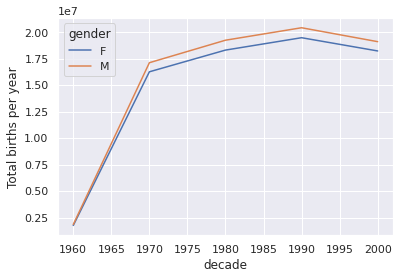

In [13]:
sns.set() 
base_decade = base.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
base_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

Através dos dados apresentados podemos observar que na década de 1960 os nascimentos de homens e mulheres eram bem próximos. No entanto, houve um "boom" de nascimentos entre os anos 1960 e 1970 acompanhados de um aumento maior no nascimento de homens que de mulheres. Essa tendência de maior nascimento de homens foi mantida nas décadas de 1980, 1990 e 2000.

## 2) Em quais dias da semana há mais nascimentos?

In [14]:
df_auxiliar1['decade'] = 10 * (df_auxiliar1['year'] // 10)
df_auxiliar1.pivot_table('births', index='weekday', columns='gender', aggfunc='sum')
print(df_auxiliar1.head())

   year  month  day gender  births    weekday  decade
0  1969      1    1      F  4046.0  Wednesday    1960
1  1969      1    1      M  4440.0  Wednesday    1960
2  1969      1    2      F  4454.0   Thursday    1960
3  1969      1    2      M  4548.0   Thursday    1960
4  1969      1    3      F  4548.0     Friday    1960


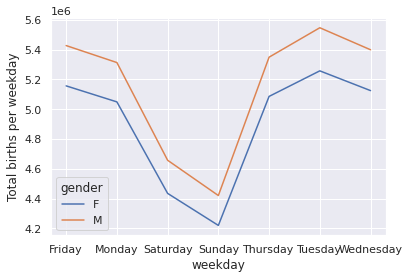

In [15]:
sns.set() 
df_auxiliar1_weekday = df_auxiliar1.pivot_table('births', index='weekday', columns='gender', aggfunc='sum') 
df_auxiliar1_weekday.plot() 
plt.ylabel("Total births per weekday") 
plt.show()

O dia da semana com mais nascimentos é a terça-feira. O mesmo padrão de distribuição nos dias da semana se repete entre homens e mulheres.

## 3) Há alguma relação entre o dia da semana e possíveis natalidades?

In [16]:
df_auxiliar1['decade'] = 10 * (df_auxiliar1['year'] // 10)
df_auxiliar1.pivot_table('births', index='weekday', columns='decade', aggfunc='sum')
print(df_auxiliar1.head())

   year  month  day gender  births    weekday  decade
0  1969      1    1      F  4046.0  Wednesday    1960
1  1969      1    1      M  4440.0  Wednesday    1960
2  1969      1    2      F  4454.0   Thursday    1960
3  1969      1    2      M  4548.0   Thursday    1960
4  1969      1    3      F  4548.0     Friday    1960


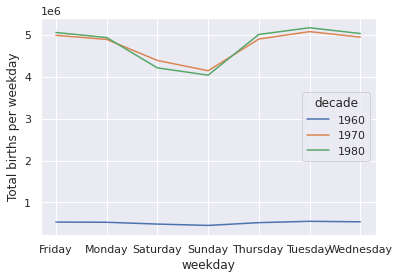

In [17]:
sns.set() 
df_auxiliar1_weekday = df_auxiliar1.pivot_table('births', index='weekday', columns='decade', aggfunc='sum') 
df_auxiliar1_weekday.plot() 
plt.ylabel("Total births per weekday") 
plt.show()

Dos dados extraídos acima podemos observar que entre as dpecadas de 1960 e 1980 houve uma queda dos nascimentos ocorridos em finais de semana, e um aumento dos nascimentos em dias úteis. Pode ser futuramente avaliada uma relação com o aumento do acesso a recursos que permitem partos cesariana, já que esses partos podem ser agendados e, portanto, acabam sendo preferencialmente agendados em dias úteis.

## 4) Conclusões que tragam a relação de natalidades, dias da semana, evolução nas decadas e sexo.

### Nascimentos por mês e por gênero

Analisamos abaixo se há alguma distorção entre os nascimentos de homens e mulheres por mês do ano.

In [18]:
base.pivot_table('births', index='month', columns='gender', aggfunc='sum')
base

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


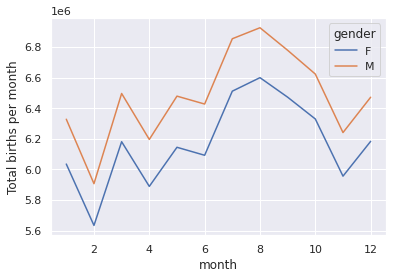

In [19]:
sns.set() 
base_month = base.pivot_table('births', index='month', columns='gender', aggfunc='sum') 
base_month.plot() 
plt.ylabel("Total births per month") 
plt.show()

Verificamos que as curvas de nascimento de homens e mulheres por mês são bem similares, não há distorções significativas.

### Nascimentos por mês e por década

Demonstramos abaixo os nascimentos por mês a cada década, para verificar se há alguma distorção significativa entre os períodos.

In [20]:
base.pivot_table('births', index='month', columns='decade', aggfunc='sum')
base

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


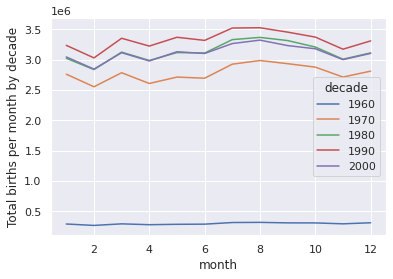

In [21]:
sns.set() 
base_month_decade = base.pivot_table('births', index='month', columns='decade', aggfunc='sum') 
base_month_decade.plot() 
plt.ylabel("Total births per month by decade") 
plt.show()

Efetuamos as seguintes observações: (a) na década de 1960 não há uma variação significativa de nascimentos entre os meses do ano; (b) a década de 1960 tem muito menos nascimentos informados que as demais, por ter somente um ano(1969) incluído na base de dados; (c) as dácadas de 1980 e 2000 tiveram números de nascimento muito parecidos, variando um pouco somente entre os meses de junho e outubro; (d) As décadas de 1970 e 200 tem uma variação similar de nascimento entre os meses.